In [1]:
import pandas as pd
import numpy as np
import glob
import datetime

In [2]:
path = "E:/Data/Monitor Data/data_frames/"

# df_wrist = pd.read_csv(path + "wrist.csv")
# df_hip = pd.read_csv(path + "hip.csv")
df_chest = pd.read_csv(path + "chest.csv")
df_thigh = pd.read_csv(path + "thigh.csv")

In [3]:
# df_chest = df_chest[df_chest["updated_activity"] != "mixed-activity"].reset_index()
# df_thigh = df_thigh[df_thigh["updated_activity"] != "mixed-activity"].reset_index()

In [4]:
df_chest["day_of_week"] = pd.to_datetime(df_chest["time"]).dt.dayofweek
df_thigh["day_of_week"] = pd.to_datetime(df_thigh["time"]).dt.dayofweek

In [5]:
df_chest.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,actual_datetime,file,time,id,primary_behavior,primary_posture,primary_upperbody,...,magnitude_of_change_Y,magnitude_of_change_Z,time_diff_seconds,year,month,day_of_week,day,hour,minute,second
0,0.061548,0.871824,0.493652,2017-10-04 01:44:45,AM_01re_DO1_medial_chest_accel_AGGREGATE,2017-10-04 01:44:45,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.000000,0.000000,1,2017,10,2,4,1,44,45
1,0.067628,0.870894,0.493904,2017-10-04 01:44:46,AM_01re_DO1_medial_chest_accel_AGGREGATE,2017-10-04 01:44:46,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,-0.000929,0.000252,1,2017,10,2,4,1,44,46
2,0.010120,0.876218,0.485257,2017-10-04 01:44:47,AM_01re_DO1_medial_chest_accel_AGGREGATE,2017-10-04 01:44:47,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.005324,-0.008647,1,2017,10,2,4,1,44,47
3,0.027951,0.922685,0.398483,2017-10-04 01:44:48,AM_01re_DO1_medial_chest_accel_AGGREGATE,2017-10-04 01:44:48,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.046466,-0.086774,1,2017,10,2,4,1,44,48
4,0.026076,0.905878,0.429324,2017-10-04 01:44:49,AM_01re_DO1_medial_chest_accel_AGGREGATE,2017-10-04 01:44:49,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,-0.016807,0.030841,1,2017,10,2,4,1,44,49


In [6]:
df_thigh.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,actual_datetime,file,time,id,primary_behavior,primary_posture,primary_upperbody,...,magnitude_of_change_Y,magnitude_of_change_Z,time_diff_seconds,year,month,day_of_week,day,hour,minute,second
0,-0.920621,-0.155646,-0.318593,2017-10-04 01:44:45,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:45,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.000000,0.000000,1,2017,10,2,4,1,44,45
1,-0.928607,-0.150999,-0.310559,2017-10-04 01:44:46,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:46,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.004647,0.008033,1,2017,10,2,4,1,44,46
2,-0.962693,-0.028313,-0.205231,2017-10-04 01:44:47,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:47,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.122686,0.105329,1,2017,10,2,4,1,44,47
3,-0.967954,-0.025304,-0.199450,2017-10-04 01:44:48,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:48,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.003008,0.005781,1,2017,10,2,4,1,44,48
4,-0.953352,-0.088372,-0.257887,2017-10-04 01:44:49,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:49,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,-0.063068,-0.058437,1,2017,10,2,4,1,44,49


In [7]:
df_chest.dtypes

Accelerometer X          float64
Accelerometer Y          float64
Accelerometer Z          float64
actual_datetime           object
file                      object
time                      object
id                        object
primary_behavior          object
primary_posture           object
primary_upperbody         object
primary_intensity         object
secondary_behavior        object
secondary_posture         object
secondary_upperbody       object
secondary_intensity       object
num_postures               int64
transition                 int64
actual_time               object
type                      object
start.time                object
broad_activity            object
detailed_activity         object
updated_activity          object
act_type                  object
act_type_broad            object
magnitude_of_change_X    float64
magnitude_of_change_Y    float64
magnitude_of_change_Z    float64
time_diff_seconds          int64
year                       int64
month     

In [8]:
participant_indices = []
for participant in df_thigh["id"].unique():
    df = df_thigh[df_thigh["id"] == participant]
    participant_indices.append(list(df.index))
    print(len(df["updated_activity"].unique())) #supposed to be 7

3
4
4
5
3
7
5
5
5
3
3
5
4
5
3
3
5
4
3
3
5
5
5
3
5
5


In [9]:
df_thigh

,Accelerometer X,Accelerometer Y,Accelerometer Z,actual_datetime,file,time,id,primary_behavior,primary_posture,primary_upperbody,...,magnitude_of_change_Y,magnitude_of_change_Z,time_diff_seconds,year,month,day_of_week,day,hour,minute,second
0,-0.920621,-0.155646,-0.318593,2017-10-04 01:44:45,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:45,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.000000,0.000000,1,2017,10,2,4,1,44,45
1,-0.928607,-0.150999,-0.310559,2017-10-04 01:44:46,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:46,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.004647,0.008033,1,2017,10,2,4,1,44,46
2,-0.962693,-0.028313,-0.205231,2017-10-04 01:44:47,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:47,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.122686,0.105329,1,2017,10,2,4,1,44,47
3,-0.967954,-0.025304,-0.199450,2017-10-04 01:44:48,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:48,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.003008,0.005781,1,2017,10,2,4,1,44,48
4,-0.953352,-0.088372,-0.257887,2017-10-04 01:44:49,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:49,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,-0.063068,-0.058437,1,2017,10,2,4,1,44,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351271,-0.059658,0.299077,0.978570,2018-05-19 02:14:58,AM_27_DO2_anterior_thigh_left_accel_AGGREGATE,2018-05-19 02:14:58,AM27,"EAT- eating and drinking, waiting",SB-sitting,no,...,0.001654,-0.000614,1,2018,5,5,19,2,14,58
351272,-0.060729,0.297250,0.977845,2018-05-19 02:14:59,AM_27_DO2_anterior_thigh_left_accel_AGGREGATE,2018-05-19 02:14:59,AM27,"EAT- eating and drinking, waiting",SB-sitting,no,...,-0.001827,-0.000725,1,2018,5,5,19,2,14,59
351273,-0.060036,0.297439,0.978145,2018-05-19 02:15:00,AM_27_DO2_anterior_thigh_left_accel_AGGREGATE,2018-05-19 02:15:00,AM27,"EAT- eating and drinking, waiting",SB-sitting,no,...,0.000189,0.000299,1,2018,5,5,19,2,15,0
351274,-0.058587,0.296746,0.977751,2018-05-19 02:15:01,AM_27_DO2_anterior_thigh_left_accel_AGGREGATE,2018-05-19 02:15:01,AM27,"EAT- eating and drinking, waiting",SB-sitting,no,...,-0.000693,-0.000394,1,2018,5,5,19,2,15,1


In [10]:
remove_vehicle = True
if remove_vehicle:
    df_chest["updated_activity"].replace("vehicle", "sit/lie", inplace=True)
    df_thigh["updated_activity"].replace("vehicle", "sit/lie", inplace=True)
    
individuals = False
if individuals:
    p = df_thigh["id"].unique()[0:2]
    df_thigh = df_thigh[df_thigh["id"] == p[0]]
    person2 = df_thigh[df_thigh["id"] == p[1]]

In [11]:
df_chest["updated_activity"].unique()

array(['stand still', 'mixed-activity', 'sit/lie', 'running', 'walking',
       'bicycling'], dtype=object)

In [12]:
print(len(df_chest))
print(len(df_thigh))

353708
351276


In [13]:
response_activity = "primary_intensity"

categorical_variables = ["primary_behavior", "primary_posture", "primary_upperbody", "primary_intensity", 
                         "secondary_behavior", "secondary_posture", "secondary_upperbody", "secondary_intensity",
                         "type", "broad_activity", "detailed_activity", "updated_activity", "act_type", "act_type_broad"]

float_variables = ["Accelerometer X", "Accelerometer Y", "Accelerometer Z", 
                   "magnitude_of_change_X", "magnitude_of_change_Y", "magnitude_of_change_Z"]

int_variables = ["num_postures", "transition", "time_diff_seconds", "day_of_week", "hour"]

datetime_variables = ["actual_datetime", "time", "actual_time", "start.time"]


model_variables = ["Accelerometer X", "Accelerometer Y", "Accelerometer Z"]#, 
                   #"magnitude_of_change_X", "magnitude_of_change_Y", "magnitude_of_change_Z"]#,
                   #"time_diff_seconds", "day_of_week", "hour"]

In [14]:
df_thigh[model_variables].describe()

,Accelerometer X,Accelerometer Y,Accelerometer Z
count,351276.000000,351276.000000,351276.000000
mean,-0.485504,-0.094795,0.398142
std,0.546423,0.238083,0.536333
min,-2.279103,-1.400530,-1.997061
25%,-0.977105,-0.177052,-0.064478
50%,-0.595547,-0.063249,0.359341
75%,-0.009380,0.042253,0.967438
max,1.005442,0.929647,1.494896


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

#dropped_vars = [response_activity] + datetime_variables + categorical_variables + int_variables

X = df_thigh[model_variables]
y = df_thigh[response_activity]

best_features = SelectKBest(f_classif, k="all").fit(X,y)

In [16]:
features_results = pd.Series(best_features.scores_)
features_results.index = model_variables
features_results

Accelerometer X    361780.248118
Accelerometer Y      5703.612480
Accelerometer Z    467413.741233
dtype: float64

In [17]:
activity_vars = ["primary_behavior", "primary_posture", "primary_upperbody", "primary_intensity", 
                 "secondary_behavior", "secondary_posture", "secondary_upperbody", "secondary_intensity",
                 "num_postures", "transition", "type", "broad_activity", "detailed_activity", 
                 "updated_activity", "act_type", "act_type_broad"]

X_vars = model_variables
y_var = response_activity

In [18]:
def cv_split(X, y, num_splits=4):
    n = len(X)
    X_trains, X_tests, y_trains, y_tests = [], [], [], []
    
    for i in range(num_splits):
        current_range = list(range(n*i//num_splits, n*(i+1)//num_splits))
        
        X_train = X.drop(current_range, axis=0)
        X_test = X.iloc[current_range]
        y_train = y.drop(current_range)
        y_test = y.iloc[current_range]
        
        X_trains.append(X_train)
        X_tests.append(X_test)
        y_trains.append(y_train)
        y_tests.append(y_test)
        
    return (X_trains, X_tests, y_trains, y_tests)

In [19]:
train_test_dict = {}

dfs = [#df_wrist, df_hip, 
       df_chest, df_thigh]

bodyparts = [#"wrist", "hip",
             "chest", "thigh"]

for i in range(len(dfs)):
    df = dfs[i]
    bodypart = bodyparts[i]
    
    X = df[X_vars]
    y = df[y_var]
    
    X_trains, X_tests, y_trains, y_tests = cv_split(X, y)
    
    train_test_dict[bodypart] = {}
    
    train_test_dict[bodypart]["X_trains"] = X_trains
    train_test_dict[bodypart]["X_tests"] = X_tests
    train_test_dict[bodypart]["y_trains"] = y_trains
    train_test_dict[bodypart]["y_tests"] = y_tests

In [20]:
print(len(df_chest))
print(len(df_thigh))

353708
351276


In [21]:
display(train_test_dict["chest"]["X_trains"][0].head())
display(train_test_dict["chest"]["X_tests"][0].head())
display(train_test_dict["chest"]["y_trains"][0].head())
display(train_test_dict["chest"]["y_tests"][0].head())

,Accelerometer X,Accelerometer Y,Accelerometer Z
88427,-0.179619,0.986887,0.113732
88428,-0.164073,0.989076,0.097650
88429,-0.124584,0.990998,0.135610
88430,-0.002103,0.997960,0.134051
88431,0.042394,0.995566,0.143470


,Accelerometer X,Accelerometer Y,Accelerometer Z
0,0.061548,0.871824,0.493652
1,0.067628,0.870894,0.493904
2,0.010120,0.876218,0.485257
3,0.027951,0.922685,0.398483
4,0.026076,0.905878,0.429324


88427    light
88428    light
88429    light
88430    light
88431    light
Name: primary_intensity, dtype: object

0    light
1    light
2    light
3    light
4    light
Name: primary_intensity, dtype: object

In [22]:
display(train_test_dict["thigh"]["X_trains"][2].head())
display(train_test_dict["thigh"]["X_tests"][2].head())
display(train_test_dict["thigh"]["y_trains"][2].head())
display(train_test_dict["thigh"]["y_tests"][2].head())

,Accelerometer X,Accelerometer Y,Accelerometer Z
0,-0.920621,-0.155646,-0.318593
1,-0.928607,-0.150999,-0.310559
2,-0.962693,-0.028313,-0.205231
3,-0.967954,-0.025304,-0.199450
4,-0.953352,-0.088372,-0.257887


,Accelerometer X,Accelerometer Y,Accelerometer Z
175638,-0.095161,0.065880,1.008671
175639,-0.089270,0.066809,1.005678
175640,-0.090578,0.065754,1.009694
175641,-0.110487,0.066195,1.004670
175642,-0.033857,0.060414,1.013868


0    light
1    light
2    light
3    light
4    light
Name: primary_intensity, dtype: object

175638    sedentary
175639    sedentary
175640    sedentary
175641    sedentary
175642    sedentary
Name: primary_intensity, dtype: object

In [23]:
from hmmlearn import hmm

In [24]:
list(df_thigh[model_variables].mean())

[-0.4855044425303226, -0.09479470600320573, 0.39814223178890745]

In [25]:
def compute_parameters(X, y):    
    act_names = y.unique()
    list_acts = []
    
    for act in act_names:
        temp_activity = X[y == act]
        list_acts.append(temp_activity)
       
    means = []
    for act in list_acts:
        means.append(list(act.mean()))
        
    transmat = []
    for a in range(len(list_acts)):
        act = list_acts[a]
        n_act = len(act)
        act_trans_mat = [0]*len(list_acts)
        
        index = act.index
        prev_i = index[0]
        
        for i in index[1:]:
            if prev_i < i-1:
                trans_act = y[prev_i+1]
                
                for j in range(len(act_names)):
                    
                    if trans_act == act_names[j]:
                        act_trans_mat[j] += 1
                        break
                        
            else:
                act_trans_mat[a] += 1
            prev_i = i
            
        act_trans_mat = [x / (n_act-1) for x in act_trans_mat]
        transmat.append(act_trans_mat)
        
#     dummies = pd.get_dummies(y)
#     dummies = dummies[act_names]
#     covars = dummies.cov()
    
    covars = []
    for act in list_acts:
        covar = act.cov()
        covars.append(covar)
    
    return [means, transmat, covars]

In [26]:
df_thigh[y_var].unique()

array(['light', 'moderate', 'sedentary', 'vigorous'], dtype=object)

In [27]:
# First runthrough

#time will have to be made into int or float variable
X = df_thigh[X_vars]
y = df_thigh[y_var]
states = list(y.unique())

hm_model = hmm.GaussianHMM(n_components = len(states), covariance_type = "full", params = "")

startprob = [1] + [0] * (len(y.unique())-1)

means, transmat, covars = compute_parameters(X, y)

hm_model.startprob_ = startprob
hm_model.means_ = means
hm_model.transmat_ = transmat
hm_model.covars_ = covars

# hm_model.fit(X)
if individuals:
    X = person2[X_vars]
    y = person2[y_var]
    
predictions = hm_model.predict(X)

In [28]:
def print_highest_accuracy(pred, y):
    num_list = []
    for state in y.unique():
        subset = y[y == state]
        indexes = list(subset.index)
        
        numbers = pred.iloc[indexes].value_counts()

        for i in range(len(states)):
            if i not in numbers.index:
                numbers[i] = 0
        
        numbers.sort_index(inplace=True)
        numbers = pd.Series(numbers)
        numbers.index = y.unique()
        
        print("State:", state)
        print(numbers)
        print("\n")
        
        num_list.append(list(numbers))

    return highest_accuracy(num_list)

#With n as number of states:
# O(n!) -- incredibly inefficient
def highest_accuracy(numbers):
    n = len(numbers)
    
#     highest_count, best_sequence = correct_count(numbers, [], 0)
    highest_count, best_sequence = lazy_correct_count(numbers)
    
    return highest_count, best_sequence, numbers
    
# def correct_count(numbers, illegal_nums, count):
#     n = len(numbers)
#     results = {}
    
#     #state
#     for i in range(n):
#         if i not in illegal_nums:
#         #numbers
#             for j in range(n):
#                 print(i, j)
#                 count += numbers[i][j]
#                 print(count)
#                 illegal_nums.append(i)

#                 if len(illegal_nums) == n:
#                     sequence = ""
#                     for number in illegal_nums:
#                         sequence = sequence + str(number)
#                     results[sequence] = count
#                 else:
#                     correct_count(numbers, illegal_nums, count)
#     return results

def lazy_correct_count(numbers):
    results = {}
    n = len(numbers)
    
    for a in range(n):
        a_count = numbers[0][a]
        
        for b in range(n):
            if b == a:
                continue
                
            b_count = a_count + numbers[1][b]
            
            for c in range(n):
                if c in [a,b]:
                    continue
                    
                c_count = b_count + numbers[2][c]
                
                for d in range(n):
                    if d in [a,b,c]:
                        continue
                        
                    d_count = c_count + numbers[3][d]
                    
                    if n == 4:
                        results[d_count] = [a,b,c,d]
                    
                    else:
                                        
                        for e in range(n):
                            if e in [a,b,c,d]:
                                continue

                            e_count = d_count + numbers[4][e]
                            
                            if n == 5:
                                results[e_count] = [a,b,c,d,e]
                                
                            else:

                                for f in range(n):
                                    if f in [a,b,c,d,e]:
                                        continue

                                    f_count = e_count + numbers[5][f]
                                    
                                    if n == 6:
                                        results[f_count] = [a,b,c,d,e,f]

                                    else:
                                        
                                        for g in range(n):
                                            if g in [a,b,c,d,e,f]:
                                                continue

                                            g_count = f_count + numbers[6][g]

                                            results[g_count] = [a,b,c,d,e,f,g]

    highest_count = max(results.keys())
    best_sequence = results[highest_count]
    return highest_count, best_sequence

In [29]:
highest_count, best_sequence, confusion_matrix = print_highest_accuracy(pd.Series(predictions), y)
best_sequence

State: light
light        62086
moderate     64516
sedentary      779
vigorous      2907
dtype: int64


State: moderate
light         3024
moderate     30271
sedentary      179
vigorous       346
dtype: int64


State: sedentary
light           681
moderate        861
sedentary    166618
vigorous        683
dtype: int64


State: vigorous
light          309
moderate      3275
sedentary        3
vigorous     14738
dtype: int64




[0, 1, 2, 3]

In [30]:
confusion_matrix = pd.DataFrame(confusion_matrix, columns = y.unique())
confusion_matrix.index = y.unique()

print("Rows are true values, columns are predicted values")
confusion_matrix

print("Precision is TP / All Predicted")
print("Recall is TP / All True")
print("\n")

for var in y.unique():
    n_true = confusion_matrix.loc[var].sum()
    n_predicted = confusion_matrix[var].sum()
    
    precision = confusion_matrix.at[var,var] / n_predicted
    recall = confusion_matrix.at[var,var] / n_true
    f1 = 2 * precision * recall / (precision + recall)
    
    print("Feature: " + var)
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("")
    print("F1: " + str(f1))
    print("\n\n")

Rows are true values, columns are predicted values
Precision is TP / All Predicted
Recall is TP / All True


Feature: light
Precision: 0.9392738275340393
Recall: 0.4765289205452536

F1: 0.6322789579811394



Feature: moderate
Precision: 0.3060056811863773
Recall: 0.8950620934358368

F1: 0.456084313297123



Feature: sedentary
Precision: 0.9942653912483068
Recall: 0.9868220773144282

F1: 0.9905297513242297



Feature: vigorous
Precision: 0.7892256613473279
Recall: 0.804256480218281

F1: 0.7966701802751426





In [31]:
highest_count

273713

In [32]:
best_sequence

[0, 1, 2, 3]

In [33]:
confusion_matrix

,light,moderate,sedentary,vigorous
light,62086,64516,779,2907
moderate,3024,30271,179,346
sedentary,681,861,166618,683
vigorous,309,3275,3,14738


In [34]:
def assign_hidden_states(val, states, results):
    for i in range(len(states)):
        if val == results[i]:
            return states[i]

# sequence = best_sequence
sequence = [0,1,2,3,4,5,6]
y_pred = pd.Series(predictions).apply(lambda x: assign_hidden_states(x, states, sequence))

In [35]:
correct = y_pred == y
print("Accuracy: " + str(sum(correct)/len(y)*100) + "%")

Accuracy: 77.91964153543083%


In [36]:
print(sum(correct))
print(highest_count)

273713
273713


In [37]:
display(y.value_counts())
display(y[correct].value_counts())

sedentary    168843
light        130288
moderate      33820
vigorous      18325
Name: primary_intensity, dtype: int64

sedentary    166618
light         62086
moderate      30271
vigorous      14738
Name: primary_intensity, dtype: int64

In [38]:
df_means = pd.DataFrame(means, columns=["Accelerometer X", "Accelerometer Y", "Accelerometer Z"])
df_means.index = y.unique()
df_means

,Accelerometer X,Accelerometer Y,Accelerometer Z
light,-0.909065,-0.029048,-0.103599
moderate,-1.000877,-0.111252,-0.015095
sedentary,0.006617,-0.139967,0.892657
vigorous,-1.057213,-0.115666,0.171737


In [39]:
list(y.unique()) + ["Accuracy"]

['light', 'moderate', 'sedentary', 'vigorous', 'Accuracy']

In [40]:
i = 0
accuracies = []
cols = list(y.unique()) + ["Accuracy"]
df_participants = pd.DataFrame(0, index=np.arange(len(participant_indices)), columns = cols)

for participant in participant_indices:
    y_temp = y.iloc[participant]
    y_pred_temp = y_pred.iloc[participant]
    accuracy = sum(y_temp == y_pred_temp) / len(y_temp) * 100
    accuracies.append(accuracy)
    
    for activity in cols:
        if activity == "Accuracy":
            df_participants.iloc[i][activity] = accuracy
        else:
            df_participants.iloc[i][activity] = len(y_temp[y_temp == activity])
    
    i += 1

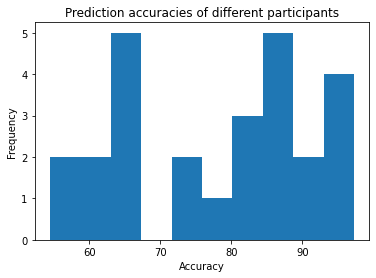

In [41]:
from matplotlib import pyplot as plt

plt.hist(accuracies)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Prediction accuracies of different participants");

In [42]:
df_participants.sort_values("Accuracy", ascending = False)

,light,moderate,sedentary,vigorous,Accuracy
11,1365,164,7553,2614,97
10,51,0,7005,0,96
15,510,40,14353,0,96
20,3516,329,4357,5142,93
12,675,3450,9591,470,92
8,640,81,10433,2203,91
4,893,53,6278,0,87
18,4830,667,8429,273,87
9,1072,98,3608,0,85
22,3494,7069,10978,326,84


In [43]:
for var in activity_vars:
    print(var)
    print(df_thigh[var].unique())
    print("\n")

primary_behavior
['LES- socializing, communicating, leisure time not screen'
 'HA- food prep and cleanup'
 'LES- screen basedentary leisure time (TV, video game, computer)'
 'HA- household management/other household activities'
 'HA- animals and pets' 'EAT- eating and drinking, waiting' 'EX- jogging'
 'HA- housework' 'TRAV- walking' 'HA- lawn, garden and houseplants'
 'HA- interior maintenance, repair, & decoration'
 'WRK- general - Education and Health Services'
 'WRK- screen basedentary - Education and Health Services' 'EX- walking'
 'PC- groom, health-related' 'PUR- purchasing goods and services'
 'CA- caring for and helping children'
 'TRAV- driver (car/truck/motorcycle)' 'EX- other'
 'EDU- taking class, research, homework' 'TRAV- passenger bus or train'
 'HA- exterior maintenance, repair, & decoration'
 'WRK- screen basedentary - Office (business, professional services, finance, info)'
 'WRK- general - Office (business, professional services, finance, info)'
 'ORG- organizational 

In [44]:
#Accuracies:
#updated_activity: ~33%
#act_type_broad: ~44% - only one where true order also had the highest accuracy
#broad_activity: ~36%

#updated and broad activity predict vehicle way too often

In [45]:
#Changing the following parameters one at a time

#Thigh:
#updated_activity: 65%

#Change all instances of vehicle to sit/lie: 
#updated_activity: 75%

#individual participants:
#failed because of varying number of activities

#aggregated by 10s: 
#updated_activity: 76.5%

#primary_intensity: 79%

#dropping mixed-activity:
#updated_activity: 89% (most incorrect come from predicting stand still as walking)